## Анотації типів у Python

У [цій статті][стаття] розповідаємо, що таке анотації типів, який у них синтаксис та найкращі практики їх застосування.  
    Перевірка типів – одна з найважливіших особливостей будь-якої сучасної програмування; саме завдяки ній з'явився TypeScript. Перевірка типів не тільки полегшує розширення кодової бази та роботу з нею в цілому, але й швидко, надійно та автоматично виявляє багато помилок програмування.  
    Вперше представлені в Python 3.5, анотації типів є основним способом позначення типів для змінних та функцій у Python.
>Анотації типів не забезпечують перевірку типів лише на рівні інтерпретатора. Вони призначені для використання розробниками, середовищами розробки, лінтерами, програмами перевірки типів і т.д.

З технічної точки зору, мова Python має _динамічну_ типізацію, тому типи відомі тільки під час виконання, а не під час компіляції (як це відбувається в мовах зі статичною типізацією, таких як C #). Однак варто згадати, що спільнота Python спільно розробила варіант інтерпретатора Python, який забезпечує статичну перевірку типів.

У [цій статті][стаття] ми розглянемо, як впровадити перевірку типів Python у наше робоче середовище таким чином, щоб зменшити труднощі під час інтеграції з модулями проектів.

### Синтаксис анотації типів
Python підтримує інструкцію типів для основних типів змінних, що підтримуються мовою: `str`, `int`, `float`, `bool` і `None`. Крім того, до комплекту входить модуль `typing`, що дозволяє використовувати більш спеціалізовані типи.
### Анотація змінних
Щоб вказати тип змінної в Python, просто додайте двокрапку з пробілом, за яким слідує тип (`str`, `int`, `List[]` і т. д.), відразу після імені змінної.
[стаття]: https://proglib.io/p/annotacii-tipov-v-python-vse-chto-nuzhno-znat-za-5-minut-2022-01-30

In [1]:
from typing import List

name: str = 'Tommy'
age: int = 24
height_in_meters: float = 1.7
colleagues: List[str] = ['Alicia', 'John']

### Анотація функцій
Синтаксис інструкції змінних працює й у параметрів функций. Однак, щоб вказати тип повернення (`return`), ми додаємо стрілку `->`, за якою слідує його тип.

In [4]:
from typing import Dict, List


def convert_celcius_to_fahrenheit(celcius_temp: float) -> float:
    return (celcius_temp * 9/5) + 32

def send_email(subject: str, body: str, recipients: List[str], cache: Dict[str, str]) -> bool:
    # пропущено для стислості
    return True  # или False

### Використання спеціальних типів
Отже, коли ми розігрілися і познайомилися з синтаксисом анотацій типів, познайомимося з більш складними типами.

#### Any
Змінна типу `Any` є необмеженою. Тому такі змінні сумісні з іншими типами (`int`, `str`, `List` тощо.), проте інші типи сумісні із нею.

In [5]:
from typing import Any

result: Any = "SUCCESS"

# також працює, тому що змінні типу Any сумісні з іншими типами
result = 10

state: str = "PENDING"

# працює, тому що всі інші типи сумісні з Any.
state = result

#### Literal
Літерали використовуються для вказівки програм перевірки типів, що значення, яке має змінна або функція, дорівнює одному із зазначених значень.

In [7]:
from typing import Literal

GENDER = Literal["male", "female", "non–conforming"]

def create_user(first_name: str, last_name: str, gender: GENDER) -> dict[str, str, GENDER]:
    return {"first_name": first_name, "last_name": last_name, "gender": gender}

create_user("John", "Bond", "male")

{'first_name': 'John', 'last_name': 'Bond', 'gender': 'male'}

У наведеному вище прикладі стать буде одним із значень літерального оголошення GENDER – «чоловічий», «жіночий» або «non–conforming».
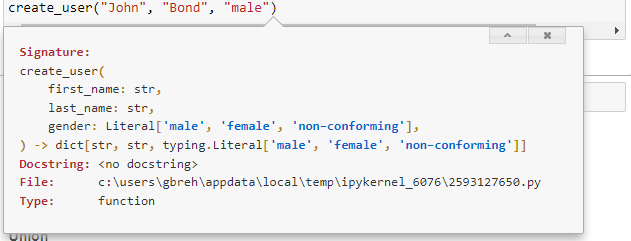

#### Union
Іноді змінна може мати властивості, що охоплюють два оголошені типи. Змінна може бути двох типів.

In [9]:
from typing import Union


def get_room_temperature() -> Union[int, float]:
    return 20.8  # 20 теж спрацює

#### TypedDict
Словники, будучи однією з найпростіших форм структури даних у Python, є одним з типових змінних, що використовуються в мові.

Використання `TypedDict` може значно покращити читання коду, особливо у великому проекті, де багато оголошень у різних місцях; відстеження того, що куди йде, стає скрутним у міру зміни розміру проекту.

In [10]:
from typing import TypedDict, Union


class Card(TypedDict):
    rank: Union[str, int]
    suit: str

# клас Card тепер має поведінку обох класів TypedDict та dict

# Card може бути використаний для анотації змінної
ace_of_spade: Card = {'rank': 'A', 'suit': '♤'}

# або може бути інстанційований
ace_of_spade = Card(rank='A', suit='♤')

#### NoReturn
Тип `NoReturn` подібний до типу `void` в інших мовах програмування. Він використовується для оголошення, що функція не має повернення.

In [12]:
from typing import NoReturn


def say_greeting() -> NoReturn:
    print("Hello World!")

#### Final
Це конструкція типізації, яка використовується для вказівки того, що змінна не повинна бути повторно призначена чи перевизначена у підкласі.

In [ ]:
from typing import Final

MIN_NAME_LENGTH: Final = 2

# видасть помилку, зафіксовану системою перевірки типів
MIN_NAME_LENGTH += 1

class Validator(object):
    MIN_NAME_LENGTH: Final[int] = 4

class UserValidator(Validator):
    # цей рядок буде відзначений інтерпретатором
    MIN_NAME_LENGTH = 3



### Використання статичної перевірки типів у Python
Інтерпретатор за промовчанням Python не здійснює перевірку типів. Проте було створено версію інтерпретатора Python – `mypy`, що забезпечує перевірку типів лише на рівні інтерпретатора.

#### Ви можете використовувати `mypy` двома способами:

Завантажити командний рядок `mypy` та використовувати його для запуску ваших скриптів Python.
Встановити розширення `mypy`, доступне в `VSCode` та `PyCharm`.
Найкращі практики анотації типів
1. Використання типу Any
Тип `Any` слід використовувати тільки тоді, коли точний тип змінної, що повертається, або параметра функції нам невідомий; це може бути при використанні сторонньої бібліотеки, яка не має анотацій типів або при використанні модуля без анотацій типів.

2. Увімкніть статичну перевірку типів
Переваги перевірки типів, що полягають у запобіганні помилкам та допомозі розробнику, будуть не такі відчутні, якщо вона буде динамічною. Якщо ви не любите командний рядок `mypy`, ви можете встановити його як розширення `VSCode` або `PyCharm`.

3. Використовуйте кортежі для масивів фіксованої довжини
Кортежі виконують подвійну функцію записування. Тому, коли у вас є відома кількість елементів у масиві, особливо коли вони не всі одного типу, для змінної краще використовувати тип кортежу.

4. Типи повернення функцій
Функції повинні виконувати одну і тільки одну дію, тому вони повинні мати певний тип.